# Nuages de mots

## Imports et stopwords

In [18]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/celineransart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [1]:
# Choisir une année
year = 1961

In [20]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [21]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [22]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [23]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"A SAMEDI .30 DECEMBRE 1961 LE som 15 /, n^” d«m ' . av. *nf, sorvntite fi7.78.39. 1P8025K rî, clinique Ho»- Jflslll P, 83.78 39 SfTsrvsnte «i Int. mén. UrKcnt. Téléphone img. inllêre A Ocnvnl. 108911K"

In [24]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [25]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"A SAMEDI .30 DECEMBRE 1961 LE som 15 /, n^” d«m ' . av. *nf, sorvntite fi7.78.39. 1P8025K rî, clinique Ho»- Jflslll P, 83.78 39 SfTsrvsnte «i Int. mén. UrKcnt. Téléphone img. inllêre A Ocnvnl. 108911K externe 2 en tin MEDECIN Dm*, dem. concierge pr cnli. médtc. veuve, pensionnée ou mén M enf mnrl tr.dch. T. 43.09.82. 108870k Mén. fionil TnC ësl dent, pr 418 nv. de l'Exposition, Bruxel. 9 • Téléph. le mntln VÔÜB3BK 78.00.30. 1870S8K JEUNE FILLE nmiv.-né tel. Bhode ... rfnm. pour s'occuper *■ » in"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [26]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [27]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1961_clean.txt!'

In [28]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'SAMEDI DECEMBRE SOM SORVNTITE CLINIQUE JFLSLLL SFTSRVSNTE INT MÉN URKCNT TÉLÉPHONE IMG INLLÊRE OCNVNL EXTERNE TIN MEDECIN CONCIERGE CNLI MÉDTC VEUVE PENSIONNÉE MÉN ENF MNRL DCH MÉN FIONIL TNC ËSL DENT EXPOSITION BRUXEL TÉLÉPH MNTLN JEUNE FILLE NMIV TEL BHODE RFNM OCCUPER RÉFÉR TÉLÉPH SNINT GONÈSE TTANIIF OULL CENTRE MAI INES RRILNE FEMME FAMILLE OCCUP IIIMIE ANS TRÈS APPOINT JOUR PNR SEMAINE PRÉF BILINGUE IILRLBUTLON CONDUIRE ÉCOLE PROME TOILETTE SERVANTE CUISINIÈRE MIILTLON MNLSON TRAIN IDR MAU'

## Nuage de mots

### Afficher les termes les plus fréquents


In [29]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('TÉL', 1243), ('RUE', 1224), ('BRUXELLES', 1001), ('PRIX', 608), ('ANS', 578), ('APP', 534), ('TRÈS', 466), ('BRUX', 457), ('ECRIRE', 383), ('SOIR', 374)]


### Créer, stocker et afficher le nuage de mots

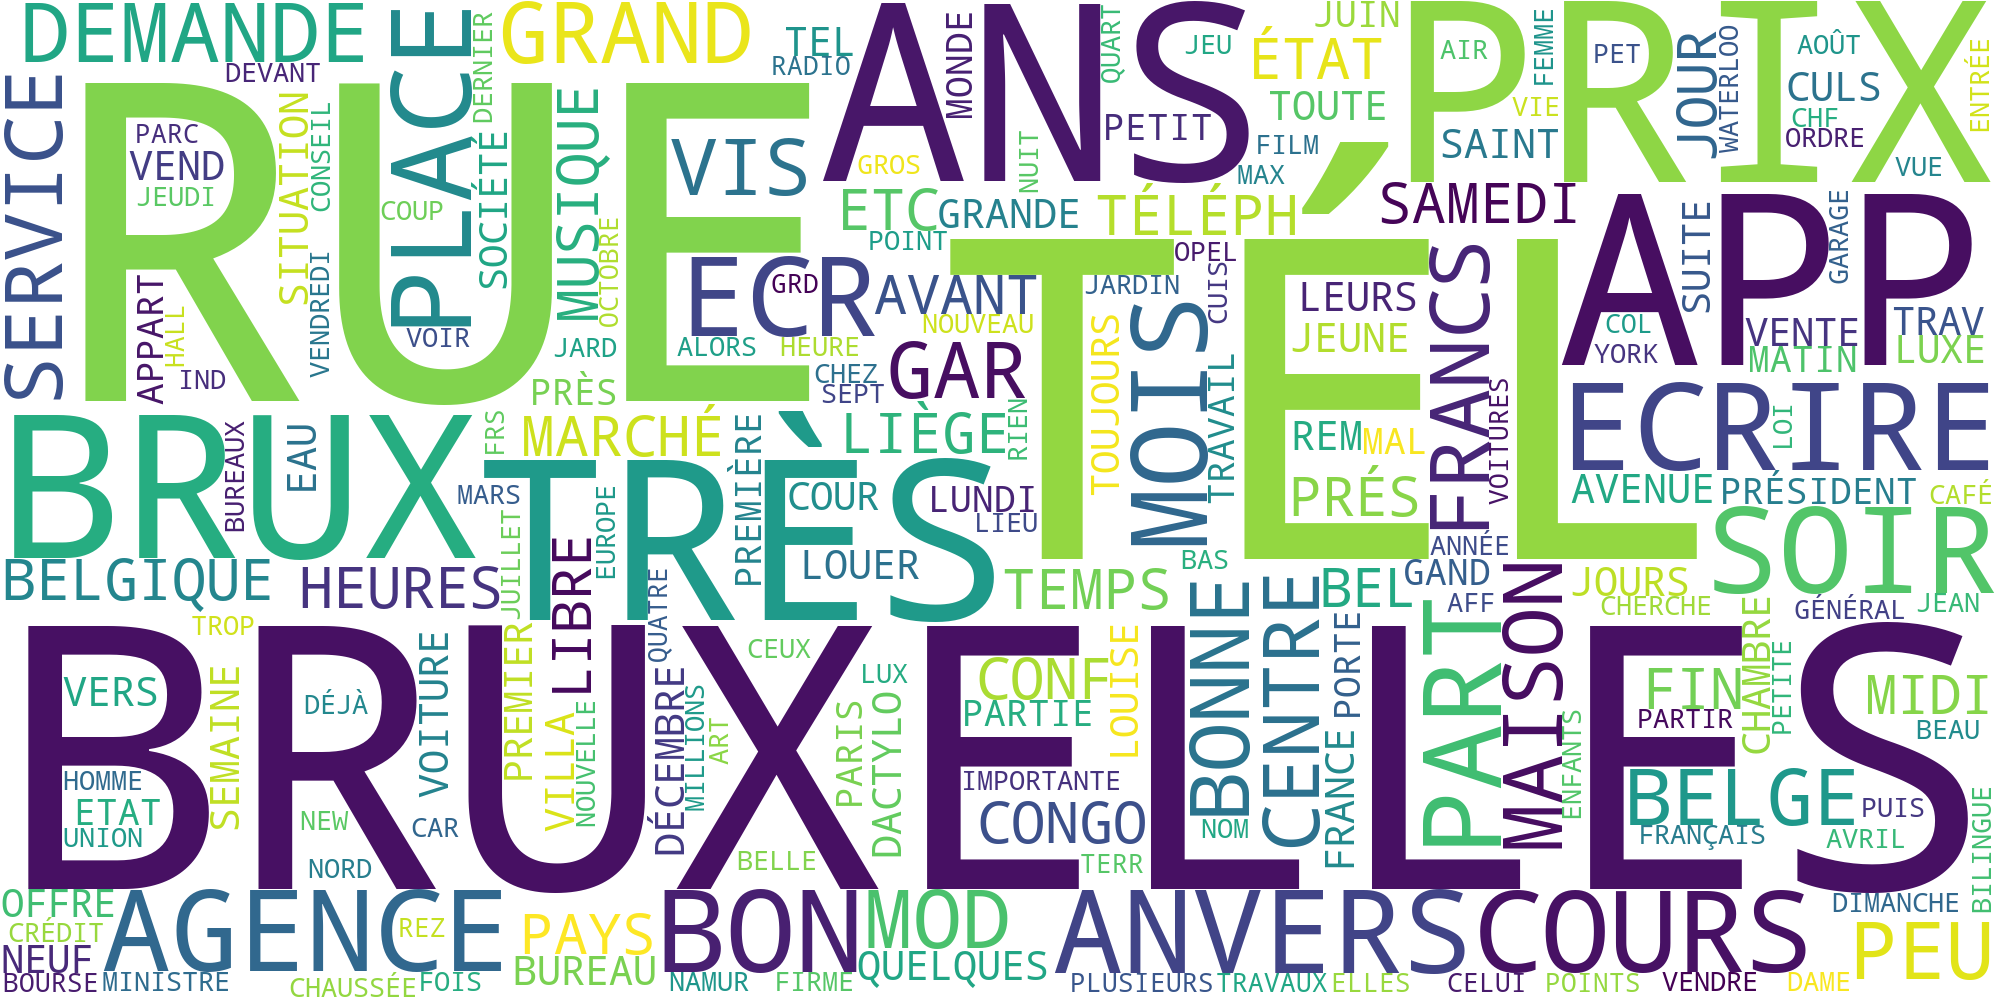

In [30]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))